## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.outliers import z_score_outliers, iqr_features

## Configurations

In [2]:
# path for the training dataset
data_path = 'C:/Users/ansar/Desktop/Workspace/Personal/MLOPs/House Price Prediction/artifacts/raw/train.csv'

# resetting pandas settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# loading the dataset
df = pd.read_csv(data_path)

In [4]:
# viewing the frist 5 rows
df.head(5)

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,7714,3.5000,37.0,4.460000,1.068000,570.0,2.600000,37.35,-121.90,2.009
1,32447,1.9489,23.0,4.604613,1.080780,1122.0,2.737057,32.79,-115.55,0.957
2,32451,2.7841,26.0,5.652299,1.207547,1644.0,4.192529,33.79,-117.11,0.932
3,23542,2.1771,20.0,4.681388,1.111437,1315.0,3.226586,32.97,-117.10,0.890
4,9728,4.0000,32.0,5.808271,1.084568,909.0,2.653646,33.92,-118.15,1.647


In [5]:
# drop the id column from the dataset
df.drop('id', axis=1, inplace=True)

In [6]:
# viewing the shape of the dataset
df.shape

(29709, 9)

In [7]:
# checking the information in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29709 entries, 0 to 29708
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       29709 non-null  float64
 1   HouseAge     29709 non-null  float64
 2   AveRooms     29709 non-null  float64
 3   AveBedrms    29709 non-null  float64
 4   Population   29709 non-null  float64
 5   AveOccup     29709 non-null  float64
 6   Latitude     29709 non-null  float64
 7   Longitude    29709 non-null  float64
 8   MedHouseVal  29709 non-null  float64
dtypes: float64(9)
memory usage: 2.0 MB


In [8]:
# checking the missing values in the dataset
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [9]:
# checking the number of datatypes in the data
df.dtypes.value_counts()

float64    9
Name: count, dtype: int64

In [10]:
# checking the dataset for duplicate records
df.duplicated().sum()

np.int64(0)

### Insights after initial analysis:
- Shape of the training dataset is (29709, 9)
- There are no missing values
- There are no duplicated records
- All the 9 columns are of float64

In [11]:
# extracting feature names from the dataset
features = df.columns.to_list()

In [12]:
# checking the summary statistics of training dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000
mean,3.850232,26.105423,5.162803,1.062108,1657.660237,2.834893,35.569857,-119.556662,2.077812
std,1.805046,12.144547,1.200469,0.094732,1284.697449,2.998741,2.082101,1.972769,1.156705
min,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,2.601200,17.000000,4.359574,1.020216,953.000000,2.395881,33.940000,-121.800000,1.206000
50%,3.515600,25.000000,5.068611,1.054502,1382.000000,2.744425,34.190000,-118.450000,1.810000
75%,4.700000,35.000000,5.854737,1.088435,1856.000000,3.123711,37.700000,-118.020000,2.667000
max,15.000100,52.000000,28.837607,5.035714,35682.000000,502.990610,41.950000,-114.550000,5.000010


In [13]:
# checking the skewness of features in training dataset
for feature in features:
    print('='*43)
    print(f'Skewness of {feature}: {df[feature].skew()}')
print('='*43)

Skewness of MedInc: 1.5720330893619674
Skewness of HouseAge: 0.4110806539822199
Skewness of AveRooms: 1.2290740355565961
Skewness of AveBedrms: 10.960907601083747
Skewness of Population: 5.649070663674036
Skewness of AveOccup: 156.32641580096825
Skewness of Latitude: 0.43687895268268095
Skewness of Longitude: -0.31409379263034765
Skewness of MedHouseVal: 0.9650981972837642


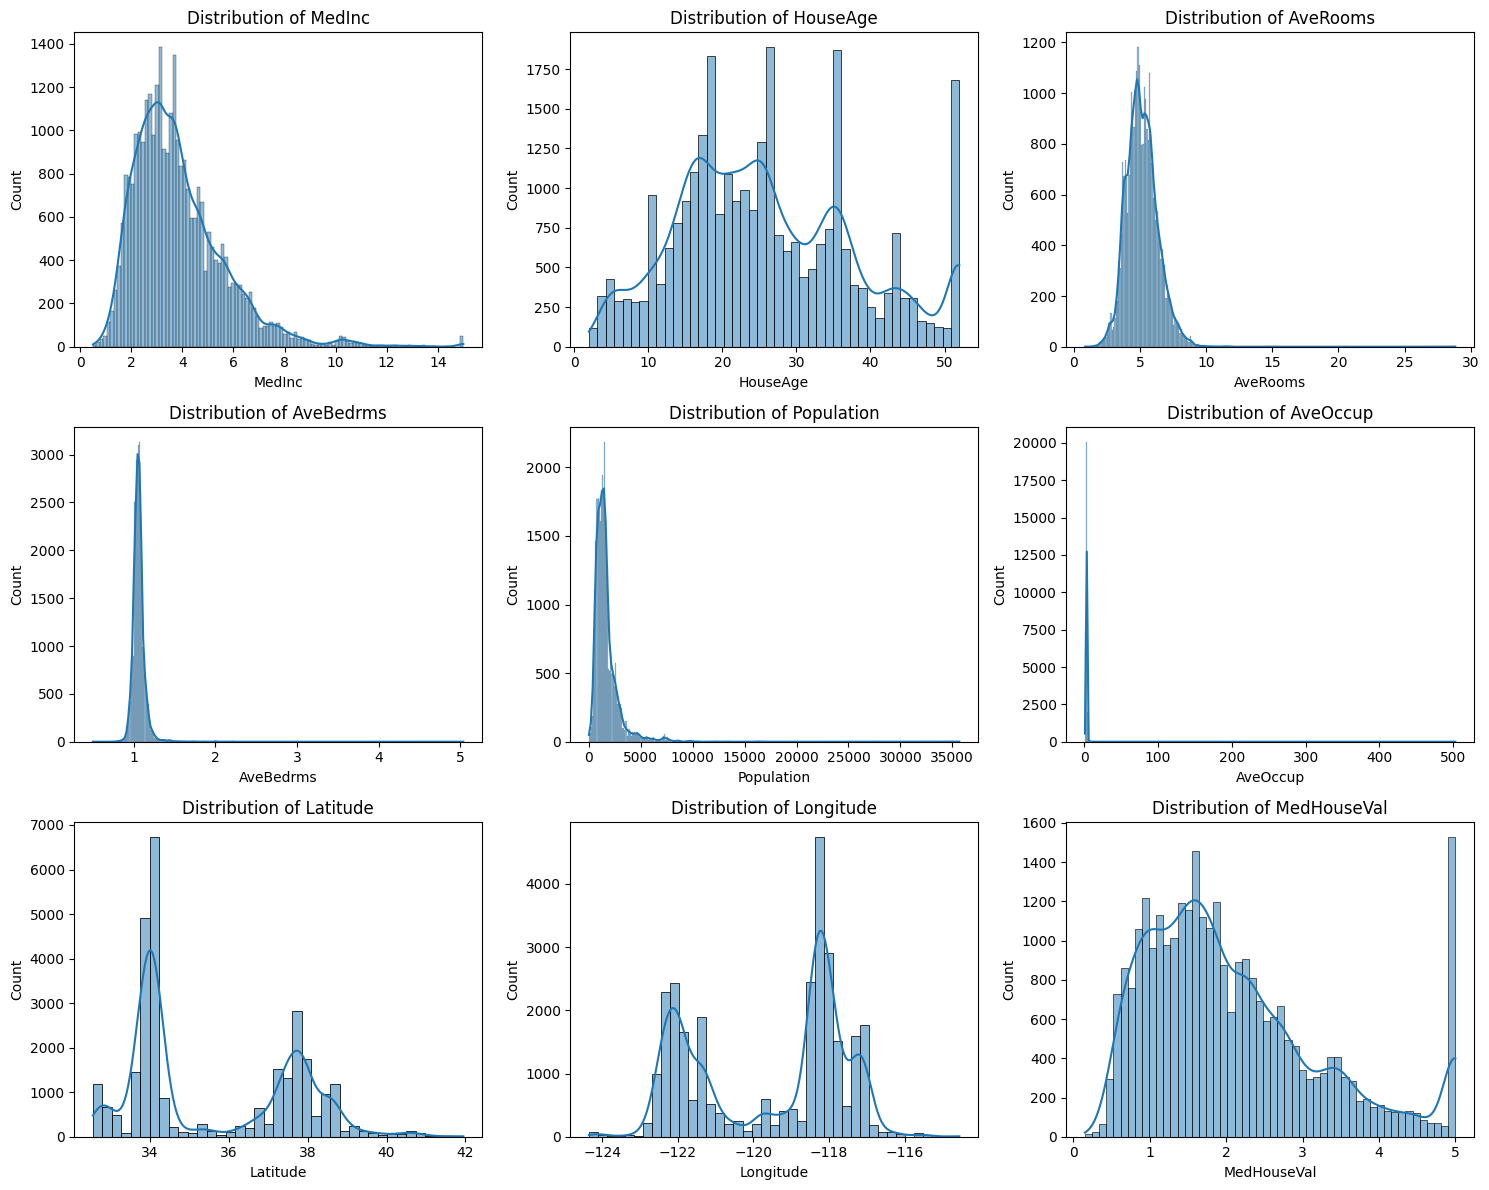

In [14]:
# checking distribution of features in the dataset
fig, ax = plt.subplots(3, 3, figsize=(15, 12))
ax = ax.flatten()

for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {feature}')

plt.tight_layout()

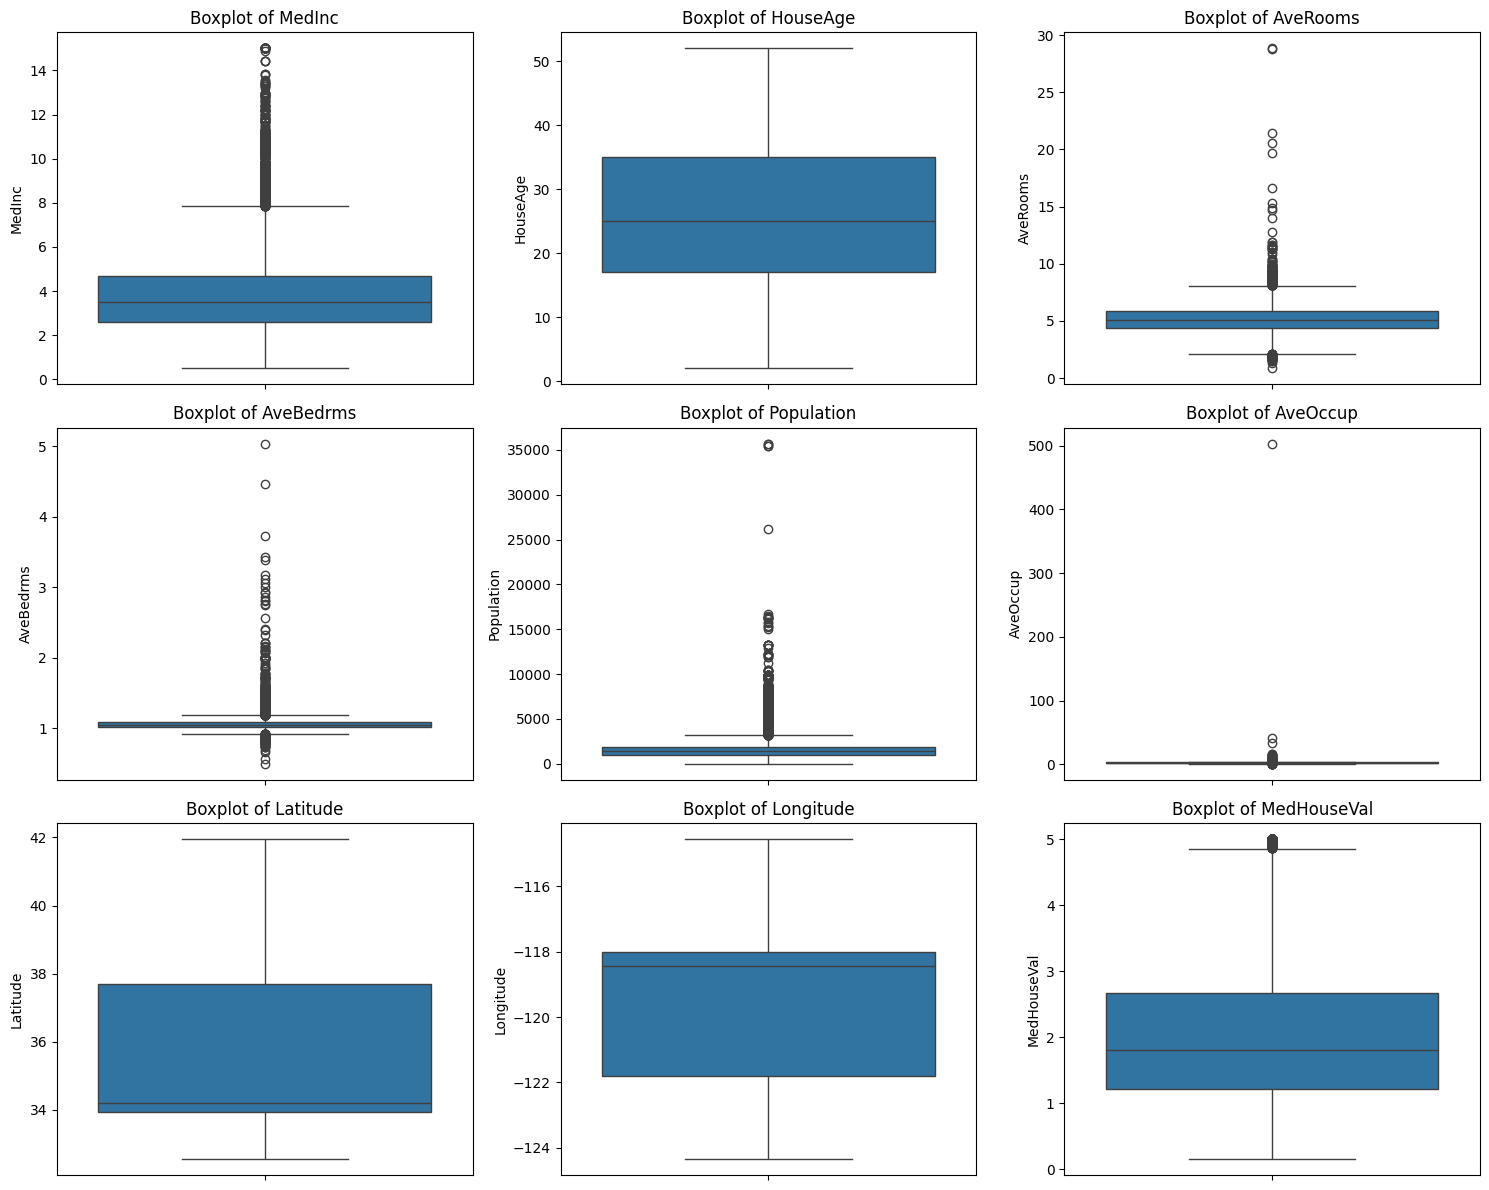

In [15]:
# checking for outliers using boxplot in the dataset
fig, ax = plt.subplots(3, 3, figsize=(15, 12))
ax = ax.flatten()

for i, feature in enumerate(features):
    sns.boxplot(df[feature], ax=ax[i])
    ax[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()

### Insights
- There is some scale difference.
- There is one slightly negatively skewed feature Longitude (-0.314), the remaining features show positive skewness, with AveOccup (156.326) and AveBedrms (10.960) being extremely right-skewed, while MedInc (1.572) and AveRooms (1.22) are moderately skewed.
- Boxplots indicate the presence of outliers.

The approach here will be to analyse skewed features using IQR method and approximately normally distributed features (skewness threshold -0.5, 0.5) using z-score method for outlier detection.

In [16]:
# classifying features which are normally distributed and not normally distributed (skewness threshold: [-0.5, 0.5])
approx_normal_feats = df.skew().between(-0.5, 0.5)
not_normal_feats = ~df.skew().between(-0.5, 0.5)

In [17]:
# extracting the column names
z_score_feats = approx_normal_feats[approx_normal_feats].index.tolist()
iqr_feats = not_normal_feats[not_normal_feats].index.tolist()

In [18]:
# viewing skewed and approximately normally distributed features
print('='*75)
print('Skewed Features:')
print(iqr_feats)
print('='*75)
print('Approximately Normally Distributed Features:')
print(z_score_feats)
print('='*75)

Skewed Features:
['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']
Approximately Normally Distributed Features:
['HouseAge', 'Latitude', 'Longitude']


In [19]:
# checking the outliers in HouseAge feature
z_score_outliers(df, 'HouseAge') 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal


Since Latitude and Longitude are real geographic values, we wont explicitly check them for outliers, and it also seems like there are no outliers in HouseAge feature.

In [20]:
# checking the no. of outliers in skewed features
print('='*50)
print('No. of outliers in skewed features')
print('='*50)

for feature in iqr_feats:
    print(f'{feature}: {len(iqr_features(df, feature))}')

# checking the percentage of outliers in skewed features
print('='*50)
print('Precentage (%) of outliers in skewed features')
print('='*50)

for feature in iqr_feats:
    print(f'{feature}: {len(iqr_features(df, feature)) / len(df[feature]) * 100:.4f}')

print('='*50)

No. of outliers in skewed features
MedInc: 917
AveRooms: 456
AveBedrms: 1317
Population: 1975
AveOccup: 1146
MedHouseVal: 1553
Precentage (%) of outliers in skewed features
MedInc: 3.0866
AveRooms: 1.5349
AveBedrms: 4.4330
Population: 6.6478
AveOccup: 3.8574
MedHouseVal: 5.2274


For skewed features, we will just cap the outliers and apply log transformation to the MedHouseVal feature.

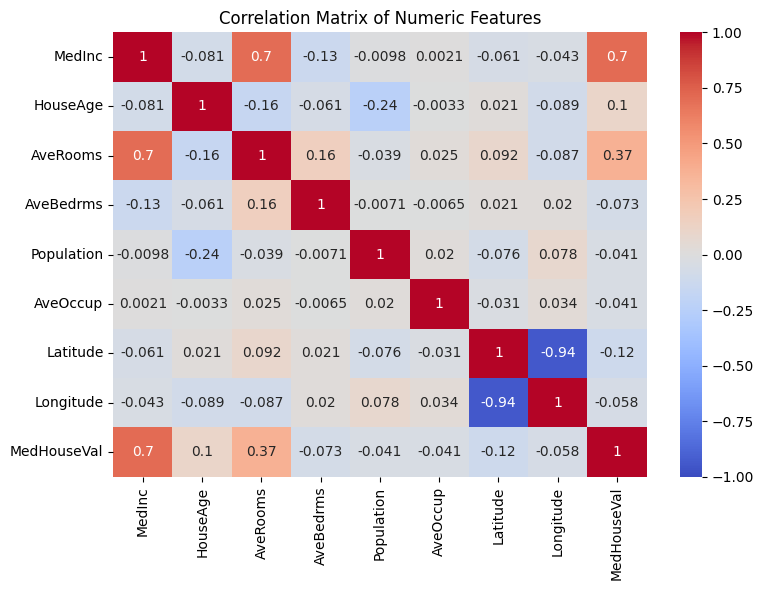

In [21]:
# checking correlation of features in the dataset
corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

There is no severe or meaningful collinearity.